# Projet Data Science HMIN232 - 2020/2021
Ce projet a pour but de proposer des modèles de classification supervisée d'assertions faites
par des figures politiques selon leur valeur de véracité, ou autrement dit, de proposer une
approche de fact-checking automatique.

Groupe : 

## **Installation**

In [12]:
# Importation des différentes librairies, classes et fonctions utilespour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# librairies générales
import pandas as pd
import re
from tabulate import tabulate
import time
import numpy as np
import pickle
import string
import base64

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns

# librairies scikit learn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# librairies des classifiers utilisés
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# librairies NLTK
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize 

 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# fonctions utilities (affichage, confusion, etc.)
from MyNLPUtilities import *


## les Données

Suite a une analyse des donnés communiqués dans le fichier csv ,nous avons décidé d'utiliser la platforme afin de télécharger les données contenant les valeur de véracités,tout en profitant du fait que ces dérniére sont plus propres que c'elles du fichier csv.



## 1 Importation des donnés


 le data frame est composé de 24454 lignes et 14 colonnes
 le data frame est composé de 24452 lignes et 14 colonnes
1    10000
2    10000
3     4452
Name: truthRating, dtype: int64


,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language
0,http://data.gesis.org/claimskg/claim_review/36...,'There will be no public funding for abortion ...,2010-03-21,3,TRUE,Bart Stupak,Stupak revises abortion stance on health care ...,"Abortion rights,Barack Obama,Bart Stupak,Ben N...",abortion,"Abortion,Health Care",politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English
1,http://data.gesis.org/claimskg/claim_review/e6...,Central Health 'is the only hospital district ...,2011-03-15,3,TRUE,Wayne Christian,State Rep. Wayne Christian says Central Health...,"Austin American-Statesman,Harris County Hospit...",NaN,Abortion,politifact,http://www.politifact.com,http://www.politifact.com/texas/statements/201...,English
2,http://data.gesis.org/claimskg/claim_review/e0...,Says most of Perry's chiefs of staff have been...,2010-08-14,3,TRUE,Bill White,Bill White says most of Gov. Rick Perry's chie...,"AT&T,Bill Clements,Bill White,Bracewell & Giul...",NaN,Ethics,politifact,http://www.politifact.com,http://www.politifact.com/texas/statements/201...,English
3,http://data.gesis.org/claimskg/claim_review/48...,Says 'as Co-Chair of the Joint Ways & Means Co...,2012-09-28,3,TRUE,Mary Nolan,Did Mary Nolan secure funding for Milwaukie br...,"Carolyn Tomei,Dave Hunt,Fetsch,Jeff Merkley,Ka...",Portland-Milwaukie Light Rail project,"State Budget,State Finances,Transportation",politifact,http://www.politifact.com,http://www.politifact.com/oregon/statements/20...,English
4,http://data.gesis.org/claimskg/claim_review/80...,Says Gary Farmer’s claim that he 'received an ...,2016-07-08,3,TRUE,Jim Waldman,Florida Senate candidate never actually receiv...,"Gary Farmer,Gwyndolen Clarke-Reed,Jim Waldman,...",Gary Farmer,Guns,politifact,http://www.politifact.com,http://www.politifact.com/florida/statements/2...,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24449,http://data.gesis.org/claimskg/claim_review/41...,'The city that I was mayor of was 50 percent L...,2018-06-07,2,MIXTURE,Lou Barletta,Hazleton wasn’t half-Latino when Lou Barletta ...,"Barletta,Bob Casey,Fox Business Network,Hazlet...",Latino,Immigration,politifact,http://www.politifact.com,http://www.politifact.com/pennsylvania/stateme...,English
24450,http://data.gesis.org/claimskg/claim_review/9e...,A set of images show a congenital anomaly that...,Unknown,2,MIXTURE,Unknown,Is This a Real Hand With Eight Fingers?,"American Society for Surgery of the Hand,Bilas...",NaN,"hands, Medical, medical anomalies, mirror hand",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/real-hand-ei...,English
24451,http://data.gesis.org/claimskg/claim_review/1a...,'You see 34 people (are) murdered every single...,2012-12-23,2,MIXTURE,Cory Booker,Cory Booker says 34 Americans are killed by gu...,"ABC,Centers for Disease Control and Prevention...",NaN,"Crime,Guns",politifact,http://www.politifact.com,http://www.politifact.com/new-jersey/statement...,English
24452,http://data.gesis.org/claimskg/claim_review/28...,'White men have committed more mass shootings ...,2017-10-02,2,MIXTURE,Newsweek,Are white males responsible for more mass shoo...,"2015 San Bernardino shooting,Aurora, Colo,Foll...",NaN,Guns,politifact,http://www.politifact.com,http://www.politifact.com/punditfact/statement...,English


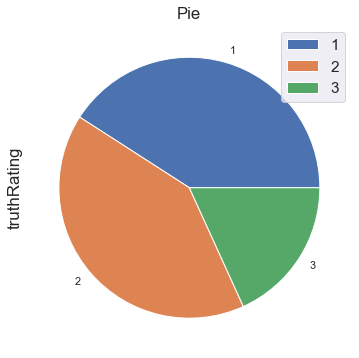

In [14]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv (r'Rendu/DATASETS/data_sets.csv')
row, col = df.shape
print(f" le data frame est composé de {row} lignes et {col} colonnes")
# suppression des lignes qui contiennes les attribus 
df = df[df['id']!= 'id']
row1, col1 = df.shape
print(f" le data frame est composé de {row1} lignes et {col1} colonnes")
df.head()

df["truthRating"].value_counts().plot(kind='pie', 
                                  figsize=(6,6),
                                  title='Pie', 
                                  fontsize=11, 
                                  legend=True)
print(df["truthRating"].value_counts())

display(df)

In [4]:
# 2 Pré traitement des données 
#explications des étapes de prés traitemens 

### 2.1 Creation d'une classe de prés traitements 



Fonction de préTraitement 

In [15]:
import re
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import inflect
import unicodedata

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

def MyCleanText(X, 
               lowercase=False, # mettre en minuscule
               removestopwords=False, # supprimer les stopwords
               removedigit=False, # supprimer les nombres 
               transformdigit=False,# transformer les nombres en lettrres 
               getstemmer=False, # conserver la racine des termes
               getlemmatisation=False,# lematisation des termes 
               remove_non_ascii=False,# suppriimer les caractéres_non_ascii
              ):
    
    sentence=str(X)

    # suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]
    # transformert les nombres en lettres 
    if transformdigit:
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
                
        words = new_words
        
        
        
    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
    
    # suppression des caractéres non ascii
    if remove_non_ascii:
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        words = new_words 
    
    
    
    return sentence   

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit
        self.transformdigit=transformdigit
        self.remove_non_ascii=remove_non_ascii

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit,
                            transformdigit=self.transformdigit,
                            remove_non_ascii=self.remove_non_ascii) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit,
            'transformdigit':self.transformdigit,
            'remove_non_ascii':self.remove_non_ascii
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


### 2.2 Sépartion en diffenrents data frame selon les classes 

In [17]:
# vrai / faux 
dfVF= df.copy()
dfVF = dfVF[dfVF["truthRating"] != '2']
print(dfVF["truthRating"].value_counts())

#vair,faux / mixture
dfVF_M= df.copy()
dfVF_M['truthRating'] =dfVF_M['truthRating'].apply(lambda x: '1' if x == '1' or x == '3' else '0')
print(dfVF_M["truthRating"].value_counts())


#vrai / faux / mixture
dfVFM=df.copy()
print(dfVFM["truthRating"].value_counts())

1    10000
3     4452
Name: truthRating, dtype: int64
1    14452
0    10000
Name: truthRating, dtype: int64
1    10000
2    10000
3     4452
Name: truthRating, dtype: int64


## 3 Tache 1 :  VRAIS / FAUX

### Test d'un calssifieur sur la colonne text sans prétraitement 

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



# selection des données
X=dfVF.text
y=dfVF.truthRating


# Création d'un jeu d'apprentissage et de test
trainsize=0.7 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour le test

testsize= 0.3
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=trainsize, 
                                               random_state=seed,
                                               test_size=testsize)

# création du pipeline en ajoutant le classifier
pipe = Pipeline([("cleaner", TextNormalizer()),
                 ("count_vectorizer", CountVectorizer(lowercase=False)),
                 ("SVM", SVC())])
pipe.fit(X_train,y_train)

print("pipeline créé")

pipeline créé


Accuracy : 0.722
Classification Report
              precision    recall  f1-score   support

           1    0.73014   0.95729   0.82843      3044
           3    0.62319   0.16641   0.26268      1292

    accuracy                        0.72163      4336
   macro avg    0.67667   0.56185   0.54555      4336
weighted avg    0.69827   0.72163   0.65985      4336



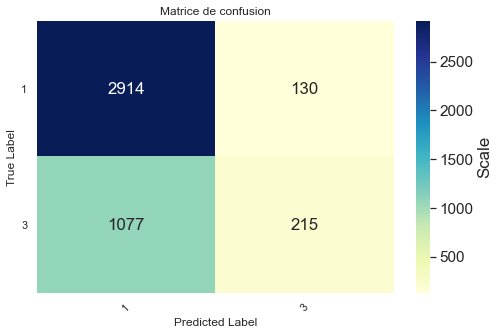

In [20]:
#from sklearn import metrics


y_pred = pipe.predict(X_test)

MyshowAllScores(y_test,y_pred)


### Tester la crosse validation 

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)


scoring = 'accuracy'


score = cross_val_score(pipe, X, y, cv=k_fold, scoring=scoring)
print('Les différentes accuracy pour les 10 évaluations sont',score,'\n')
print ('Accuracy moyenne : ',score.mean(),' standard deviation', score.std())   

Les différentes accuracy pour les 10 évaluations sont [0.73029046 0.72337483 0.70519031 0.71349481 0.71626298 0.70865052
 0.72525952 0.74048443 0.72041522 0.71072664] 

Accuracy moyenne :  0.7194149712606546  standard deviation 0.01025535323307757


### Tester l'accuracy de plusieurs classifieur 

paramétrage par defaut des classifieurs 

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# selection des données
X=dfVF.text
y=dfVF.truthRating

count_vect = CountVectorizer()
datatarget = dfVF['truthRating']

print(datatarget.shape)

X_train_counts = count_vect.fit_transform(dfVF.text)
print(X_train_counts.shape)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30

X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                               datatarget, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

seed=7
models = [
            'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='lbfgs',max_iter = 20000)
        ]

params = {
            models[0]:{},
    
            models[1]:{},
    
            models[2]:{},
    
            models[3]:{},
    
            models[4]:{},
    
            models[5]:{}
         }

y_test = 0
test_scores = []


for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                       refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    
    print("scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(X_test)
    

(14452,)
(14452, 12746)
(14452, 12746)
ADB
scores: 0.6844290657439446
GBC
scores: 0.6858131487889274
RFC
scores: 0.6740484429065744
KNC
scores: 0.6113033448673588
SVC
scores: 0.6883506343713955
logisticRegression
scores: 0.6934256055363323


In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


text_normalizer=TextNormalizer(lowercase=True,
                               removestopwords=True,
                               removedigit=True,
                              getstemmer=True)  
# d'appliquer fit.transform pour appliquer les pré-traitements
dfVF.text=text_normalizer.fit_transform(dfVF.text)
# selection des données
X=dfVF.text
y=dfVF.truthRating

count_vect = CountVectorizer()
datatarget = dfVF['truthRating']

print(datatarget.shape)

X_train_counts = count_vect.fit_transform(dfVF.text)
print(X_train_counts.shape)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30

X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                               datatarget, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

seed=7
models = [
            'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='lbfgs',max_iter = 20000)
        ]

params = {
            models[0]:{},
    
            models[1]:{},
    
            models[2]:{},
    
            models[3]:{},
    
            models[4]:{},
    
            models[5]:{}
         }

y_test = 0
test_scores = []


for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                       refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    
    print("scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(X_test)
    

(14452,)
(14452, 12746)
(14452, 12746)
ADB
scores: 0.6844290657439446
GBC
scores: 0.6858131487889274
RFC
scores: 0.6740484429065744
KNC
scores: 0.6113033448673588
SVC
scores: 0.6883506343713955
logisticRegression
scores: 0.6934256055363323


# Tache 2 : VRAIS, FAUX / MIXTURE

# Premiere classification sans prétraitement


In [ ]:
Nous avons crée une fonction qui permet de faire une classification multi features et multi classifieurs qui permet de donner les meilleurs resultat ainsi que les meilleurs paramétres

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
def classification_sans_pretraitement(features):
        
        # selection des données
        X=dfVF_M[features].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1
)

        count_vect = CountVectorizer()
        datatarget = dfVF_M['truthRating']

        print(datatarget.shape)

        X_train_counts = count_vect.fit_transform(X)
        print(X_train_counts.shape)

        tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
        X_train_tf = tf_transformer.transform(X_train_counts)
        print(X_train_tf.shape)

        validation_size=0.3 #30% du jeu de données pour le test
        testsize= 1-validation_size
        seed=30

        X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                                datatarget, 
                                                train_size=validation_size, 
                                                random_state=seed,
                                                test_size=testsize)
        seed=1
        models = [
                'ADB',
                'GBC',
                'RFC',
                'KNC',
                'SVC',
                'logisticRegression'
                ]
        clfs = [
                AdaBoostClassifier(random_state=seed),
                GradientBoostingClassifier(random_state=seed),
                RandomForestClassifier(random_state=seed,n_jobs=-1),
                KNeighborsClassifier(n_jobs=-1),
                SVC(random_state=seed,probability=True),
                LogisticRegression(solver='newton-cg', multi_class='multinomial')
                ]

        params = {
                models[0]:{'learning_rate':[ 0.3], 'n_estimators':[200]},
                models[1]:{'learning_rate':[0.3],'n_estimators':[100,200], 'max_depth':[3],
                        'min_samples_split':[2],'min_samples_leaf': [2]},
                models[2]:{'n_estimators':[200], 'criterion':['gini'],'min_samples_split':[2],
                        'min_samples_leaf': [2]},
                models[3]:{'n_neighbors':[2,3,4,5], 'weights':['distance'],'leaf_size':[15]},
                models[4]: {'C':[100], 'tol': [0.01],
                        'kernel':['sigmoid']},
                models[5]: {'C':[1000,2000], 'tol': [0.0001,0.001]}
                }



        for name, estimator in zip(models,clfs):
                print(name)
                clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                                refit='True', n_jobs=-1, cv=5)
                clf.fit(X_train, y_train)

                print("best params: " + str(clf.best_params_))
                print("best scores: " + str(clf.best_score_))
               
                y_pred = clf.best_estimator_.predict(X_test)
                MyshowAllScores(y_test,y_pred)

En utilisent text claims comme jeu de donnée
(24452,)
(24452, 22754)
(24452, 22754)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.6391274710293116
Accuracy : 0.646
Classification Report
              precision    recall  f1-score   support

           0    0.61027   0.37461   0.46424      7010
           1    0.65787   0.83408   0.73557     10107

    accuracy                        0.64591     17117
   macro avg    0.63407   0.60434   0.59991     17117
weighted avg    0.63838   0.64591   0.62445     17117



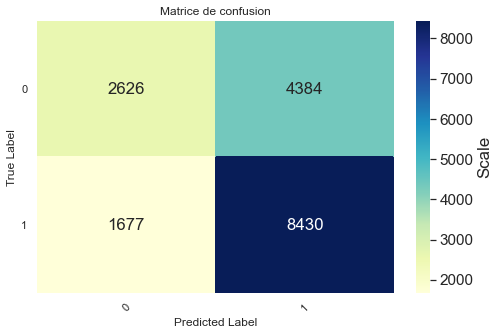

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6451261077027948
Accuracy : 0.646
Classification Report
              precision    recall  f1-score   support

           0    0.60017   0.40856   0.48617      7010
           1    0.66416   0.81122   0.73036     10107

    accuracy                        0.64632     17117
   macro avg    0.63216   0.60989   0.60826     17117
weighted avg    0.63795   0.64632   0.63035     17117



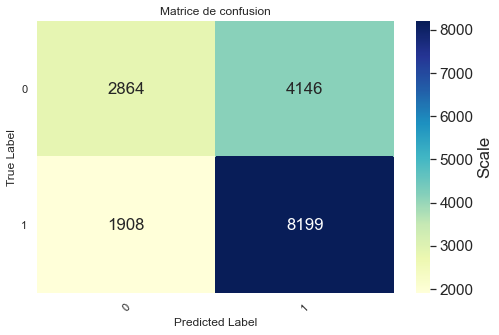

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6599863667348329
Accuracy : 0.654
Classification Report
              precision    recall  f1-score   support

           0    0.60500   0.44836   0.51503      7010
           1    0.67564   0.79697   0.73131     10107

    accuracy                        0.65420     17117
   macro avg    0.64032   0.62267   0.62317     17117
weighted avg    0.64671   0.65420   0.64274     17117



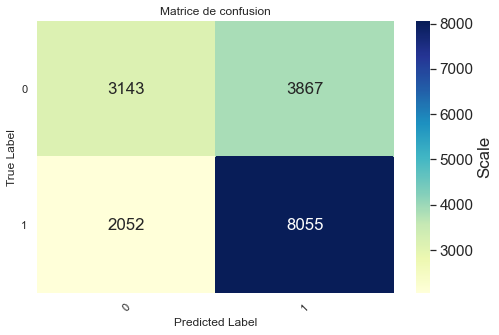

KNC
best params: {'leaf_size': 15, 'n_neighbors': 5, 'weights': 'distance'}
best scores: 0.623858214042263
Accuracy : 0.626
Classification Report
              precision    recall  f1-score   support

           0    0.54234   0.55735   0.54974      7010
           1    0.68698   0.67379   0.68032     10107

    accuracy                        0.62610     17117
   macro avg    0.61466   0.61557   0.61503     17117
weighted avg    0.62774   0.62610   0.62684     17117



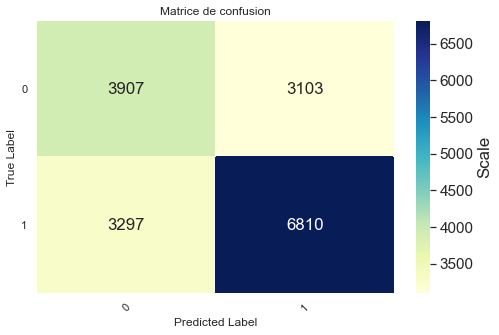

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.6010906612133606
Accuracy : 0.594
Classification Report
              precision    recall  f1-score   support

           0    0.50364   0.53281   0.51782      7010
           1    0.66241   0.63580   0.64883     10107

    accuracy                        0.59362     17117
   macro avg    0.58302   0.58430   0.58332     17117
weighted avg    0.59739   0.59362   0.59517     17117



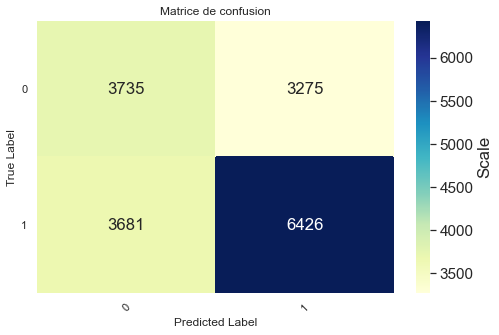

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.623858214042263
Accuracy : 0.613
Classification Report
              precision    recall  f1-score   support

           0    0.52839   0.50713   0.51754      7010
           1    0.66744   0.68606   0.67662     10107

    accuracy                        0.61278     17117
   macro avg    0.59791   0.59660   0.59708     17117
weighted avg    0.61049   0.61278   0.61147     17117



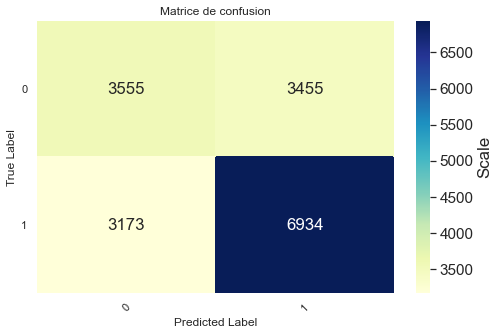

En utilisent text claims et author comme jeu de donnée
(24452,)
(24452, 24491)
(24452, 24491)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.6808452624403545
Accuracy : 0.685
Classification Report
              precision    recall  f1-score   support

           0    0.59352   0.73466   0.65659      7010
           1    0.77962   0.65103   0.70955     10107

    accuracy                        0.68528     17117
   macro avg    0.68657   0.69285   0.68307     17117
weighted avg    0.70341   0.68528   0.68786     17117



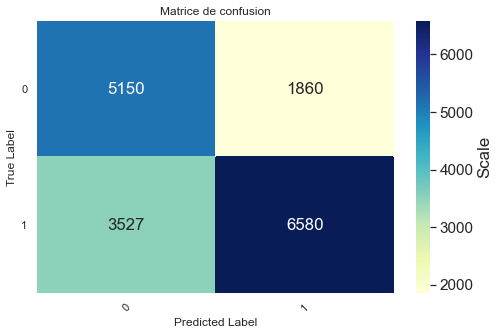

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6819359236537151
Accuracy : 0.685
Classification Report
              precision    recall  f1-score   support

           0    0.59513   0.71840   0.65098      7010
           1    0.77192   0.66103   0.71218     10107

    accuracy                        0.68452     17117
   macro avg    0.68353   0.68971   0.68158     17117
weighted avg    0.69952   0.68452   0.68712     17117



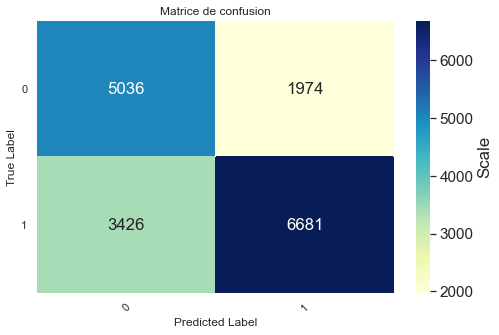

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6846625766871165
Accuracy : 0.679
Classification Report
              precision    recall  f1-score   support

           0    0.62188   0.55064   0.58410      7010
           1    0.71127   0.76778   0.73845     10107

    accuracy                        0.67886     17117
   macro avg    0.66658   0.65921   0.66127     17117
weighted avg    0.67466   0.67886   0.67524     17117



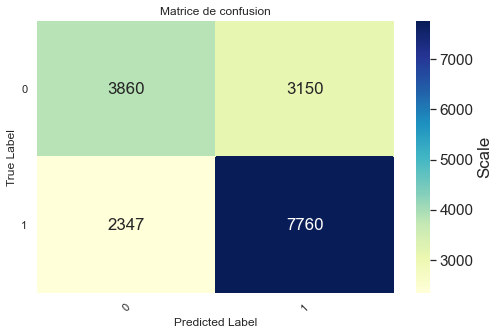

KNC
best params: {'leaf_size': 15, 'n_neighbors': 5, 'weights': 'distance'}
best scores: 0.6430811179277438
Accuracy : 0.642
Classification Report
              precision    recall  f1-score   support

           0    0.56313   0.56120   0.56216      7010
           1    0.69638   0.69803   0.69720     10107

    accuracy                        0.64199     17117
   macro avg    0.62975   0.62961   0.62968     17117
weighted avg    0.64181   0.64199   0.64190     17117



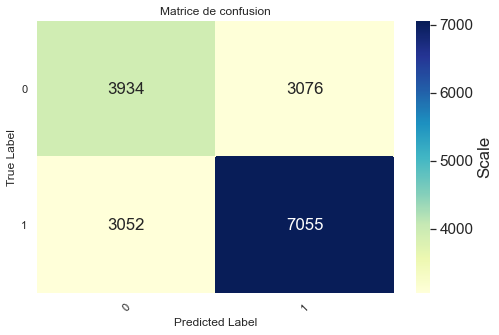

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.6145875937286981
Accuracy : 0.607
Classification Report
              precision    recall  f1-score   support

           0    0.51930   0.54308   0.53093      7010
           1    0.67270   0.65133   0.66184     10107

    accuracy                        0.60700     17117
   macro avg    0.59600   0.59721   0.59638     17117
weighted avg    0.60988   0.60700   0.60823     17117



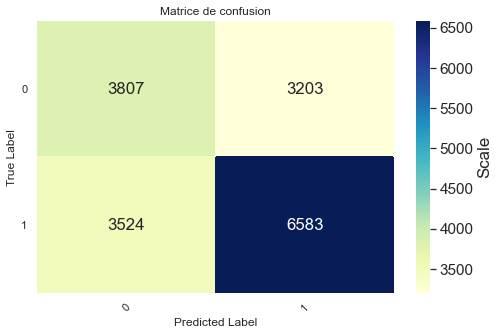

logisticRegression
best params: {'C': 1000, 'tol': 0.001}
best scores: 0.6417177914110429
Accuracy : 0.635
Classification Report
              precision    recall  f1-score   support

           0    0.55767   0.52967   0.54331      7010
           1    0.68477   0.70862   0.69649     10107

    accuracy                        0.63533     17117
   macro avg    0.62122   0.61914   0.61990     17117
weighted avg    0.63272   0.63533   0.63376     17117



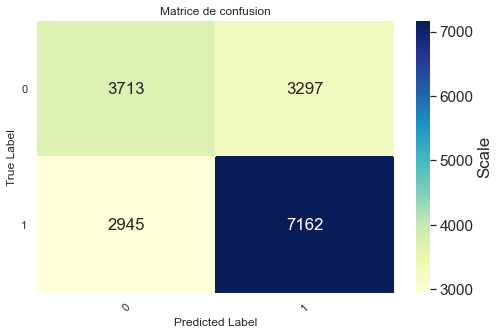

En utilisent text claims, headline et author comme jeu de donnée
(24452,)
(24452, 26782)
(24452, 26782)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.7015678254942059
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.61829   0.70613   0.65930      7010
           1    0.77390   0.69764   0.73379     10107

    accuracy                        0.70112     17117
   macro avg    0.69609   0.70188   0.69654     17117
weighted avg    0.71017   0.70112   0.70328     17117



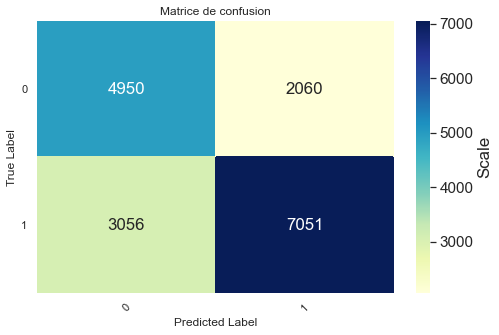

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6958418541240626
Accuracy : 0.693
Classification Report
              precision    recall  f1-score   support

           0    0.61204   0.68459   0.64629      7010
           1    0.76164   0.69902   0.72899     10107

    accuracy                        0.69311     17117
   macro avg    0.68684   0.69181   0.68764     17117
weighted avg    0.70038   0.69311   0.69512     17117



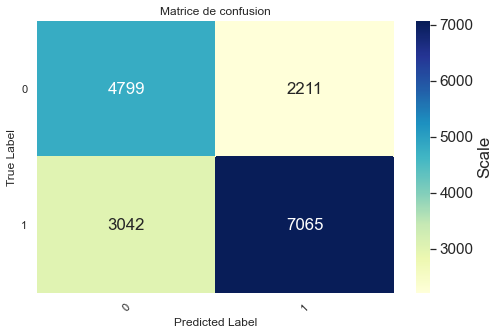

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6991138377641446
Accuracy : 0.695
Classification Report
              precision    recall  f1-score   support

           0    0.63804   0.58816   0.61208      7010
           1    0.72905   0.76858   0.74829     10107

    accuracy                        0.69469     17117
   macro avg    0.68354   0.67837   0.68019     17117
weighted avg    0.69178   0.69469   0.69251     17117



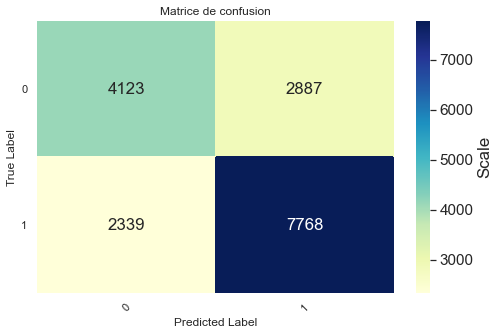

KNC
best params: {'leaf_size': 15, 'n_neighbors': 4, 'weights': 'distance'}
best scores: 0.6343558282208589
Accuracy : 0.634
Classification Report
              precision    recall  f1-score   support

           0    0.55424   0.54665   0.55042      7010
           1    0.68852   0.69506   0.69178     10107

    accuracy                        0.63428     17117
   macro avg    0.62138   0.62086   0.62110     17117
weighted avg    0.63353   0.63428   0.63389     17117



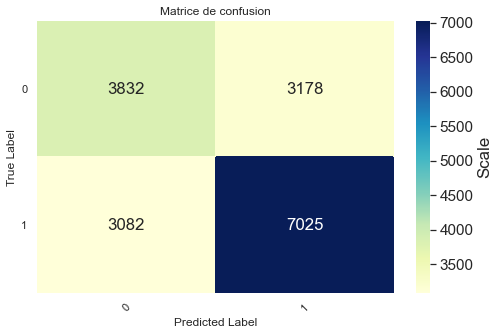

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.6158145875937288
Accuracy : 0.622
Classification Report
              precision    recall  f1-score   support

           0    0.53829   0.54551   0.54187      7010
           1    0.68181   0.67547   0.67863     10107

    accuracy                        0.62225     17117
   macro avg    0.61005   0.61049   0.61025     17117
weighted avg    0.62304   0.62225   0.62262     17117



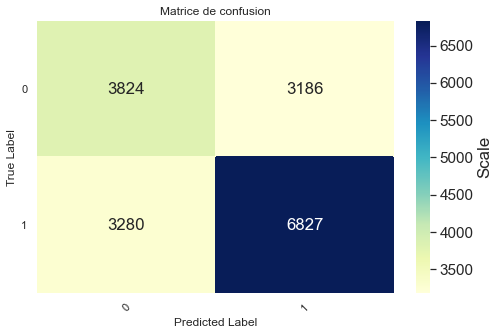

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.6413087934560326
Accuracy : 0.651
Classification Report
              precision    recall  f1-score   support

           0    0.57947   0.53780   0.55786      7010
           1    0.69466   0.72930   0.71156     10107

    accuracy                        0.65087     17117
   macro avg    0.63706   0.63355   0.63471     17117
weighted avg    0.64748   0.65087   0.64861     17117



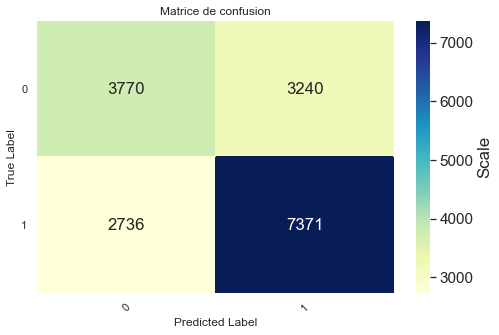

En utilisent text claims, headline et author comme jeu de donnée
(24452,)
(24452, 26782)
(24452, 26782)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.7015678254942059
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.61829   0.70613   0.65930      7010
           1    0.77390   0.69764   0.73379     10107

    accuracy                        0.70112     17117
   macro avg    0.69609   0.70188   0.69654     17117
weighted avg    0.71017   0.70112   0.70328     17117



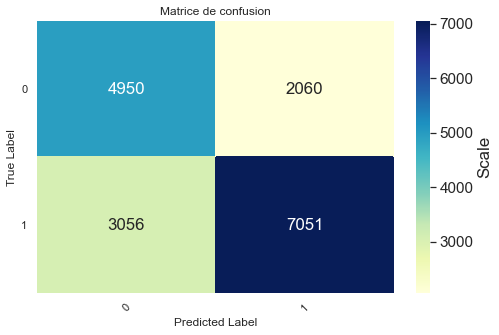

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6958418541240626
Accuracy : 0.693
Classification Report
              precision    recall  f1-score   support

           0    0.61204   0.68459   0.64629      7010
           1    0.76164   0.69902   0.72899     10107

    accuracy                        0.69311     17117
   macro avg    0.68684   0.69181   0.68764     17117
weighted avg    0.70038   0.69311   0.69512     17117



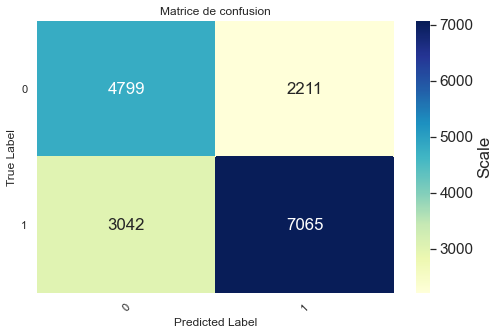

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6991138377641446
Accuracy : 0.695
Classification Report
              precision    recall  f1-score   support

           0    0.63804   0.58816   0.61208      7010
           1    0.72905   0.76858   0.74829     10107

    accuracy                        0.69469     17117
   macro avg    0.68354   0.67837   0.68019     17117
weighted avg    0.69178   0.69469   0.69251     17117



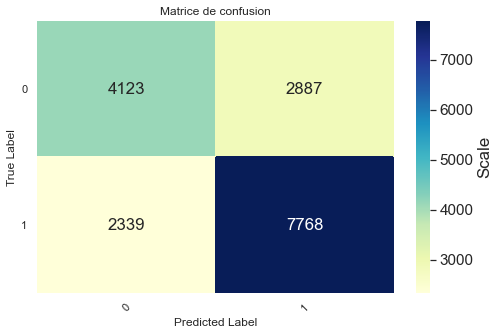

KNC
best params: {'leaf_size': 15, 'n_neighbors': 4, 'weights': 'distance'}
best scores: 0.6343558282208589
Accuracy : 0.634
Classification Report
              precision    recall  f1-score   support

           0    0.55424   0.54665   0.55042      7010
           1    0.68852   0.69506   0.69178     10107

    accuracy                        0.63428     17117
   macro avg    0.62138   0.62086   0.62110     17117
weighted avg    0.63353   0.63428   0.63389     17117



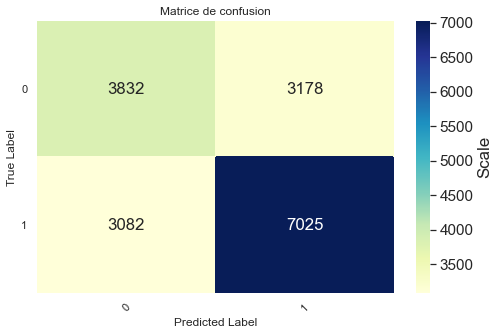

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.6158145875937288
Accuracy : 0.622
Classification Report
              precision    recall  f1-score   support

           0    0.53829   0.54551   0.54187      7010
           1    0.68181   0.67547   0.67863     10107

    accuracy                        0.62225     17117
   macro avg    0.61005   0.61049   0.61025     17117
weighted avg    0.62304   0.62225   0.62262     17117



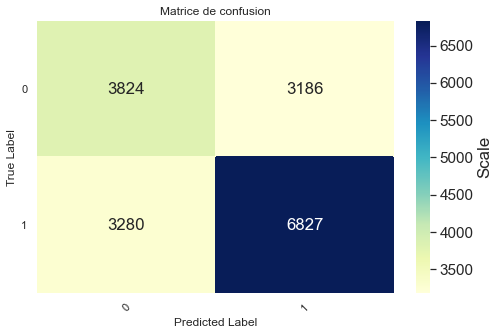

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.6413087934560326
Accuracy : 0.651
Classification Report
              precision    recall  f1-score   support

           0    0.57947   0.53780   0.55786      7010
           1    0.69466   0.72930   0.71156     10107

    accuracy                        0.65087     17117
   macro avg    0.63706   0.63355   0.63471     17117
weighted avg    0.64748   0.65087   0.64861     17117



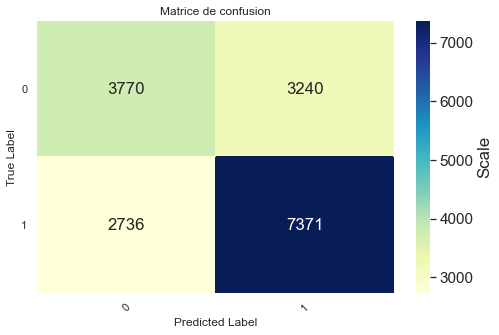

En utilisent text claims, truthreating, headline et author comme jeu de donnée
(24452,)
(24452, 26782)
(24452, 26782)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.7015678254942059
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.61829   0.70613   0.65930      7010
           1    0.77390   0.69764   0.73379     10107

    accuracy                        0.70112     17117
   macro avg    0.69609   0.70188   0.69654     17117
weighted avg    0.71017   0.70112   0.70328     17117



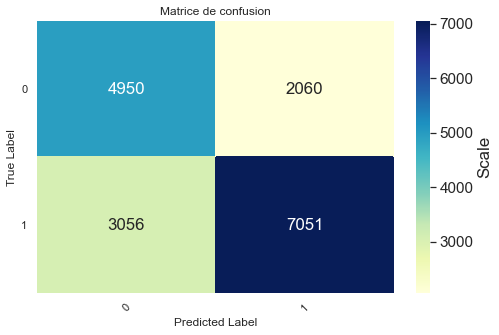

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6958418541240626
Accuracy : 0.693
Classification Report
              precision    recall  f1-score   support

           0    0.61204   0.68459   0.64629      7010
           1    0.76164   0.69902   0.72899     10107

    accuracy                        0.69311     17117
   macro avg    0.68684   0.69181   0.68764     17117
weighted avg    0.70038   0.69311   0.69512     17117



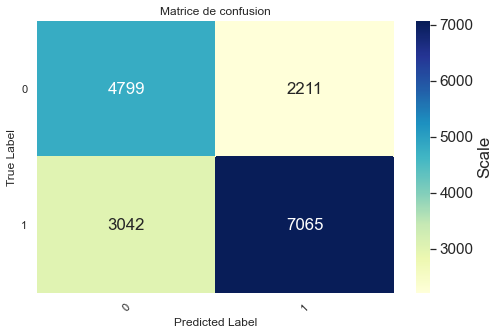

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6991138377641446
Accuracy : 0.695
Classification Report
              precision    recall  f1-score   support

           0    0.63804   0.58816   0.61208      7010
           1    0.72905   0.76858   0.74829     10107

    accuracy                        0.69469     17117
   macro avg    0.68354   0.67837   0.68019     17117
weighted avg    0.69178   0.69469   0.69251     17117



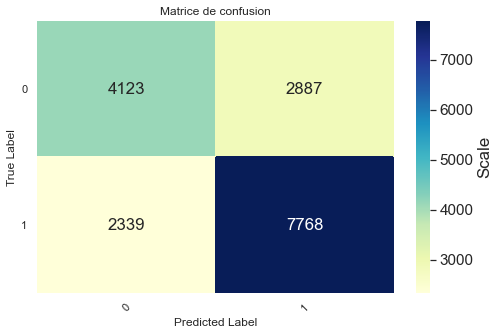

KNC
best params: {'leaf_size': 15, 'n_neighbors': 4, 'weights': 'distance'}
best scores: 0.6343558282208589
Accuracy : 0.634
Classification Report
              precision    recall  f1-score   support

           0    0.55424   0.54665   0.55042      7010
           1    0.68852   0.69506   0.69178     10107

    accuracy                        0.63428     17117
   macro avg    0.62138   0.62086   0.62110     17117
weighted avg    0.63353   0.63428   0.63389     17117



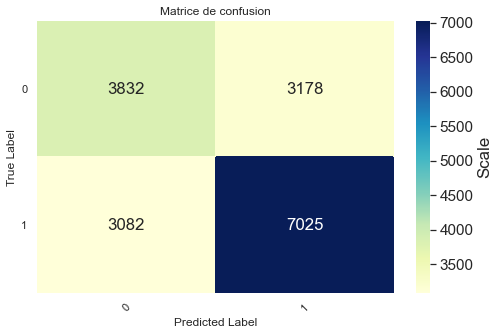

SVC
best params: {'C': 100, 'kernel': 'sigmoid', 'tol': 0.01}
best scores: 0.6158145875937288
Accuracy : 0.622
Classification Report
              precision    recall  f1-score   support

           0    0.53829   0.54551   0.54187      7010
           1    0.68181   0.67547   0.67863     10107

    accuracy                        0.62225     17117
   macro avg    0.61005   0.61049   0.61025     17117
weighted avg    0.62304   0.62225   0.62262     17117



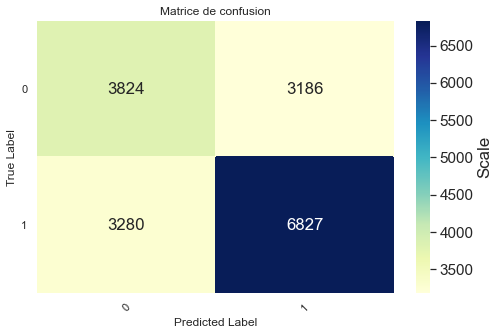

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.6413087934560326
Accuracy : 0.651
Classification Report
              precision    recall  f1-score   support

           0    0.57947   0.53780   0.55786      7010
           1    0.69466   0.72930   0.71156     10107

    accuracy                        0.65087     17117
   macro avg    0.63706   0.63355   0.63471     17117
weighted avg    0.64748   0.65087   0.64861     17117



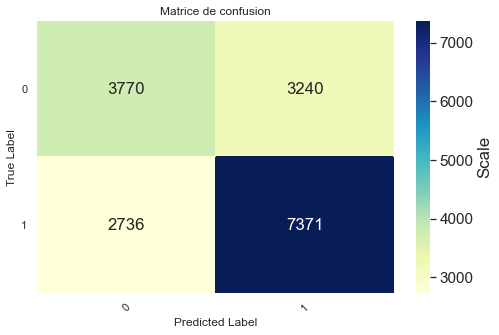

In [9]:
import numpy as np

print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
classification_sans_pretraitement(features)

print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
classification_sans_pretraitement(features)

print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
classification_sans_pretraitement(features)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
classification_sans_pretraitement(features)
print("En utilisent text claims, truthreating, headline et author comme jeu de donnée")
features = np.array(["text","headline","author","truthRating"])
classification_sans_pretraitement(features)

# Tache 3 : VRAIS / FAUX / MIXTURE